In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [5]:
df1 = pd.read_excel('data.xlsx')
df2 = df1.drop(columns= ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])
df2.head()



,Barcode,Gender (M/F),Age,Geographic Origin,K9 Test Result,PCR Test result
0,202586050-1,M,NaN,Asia,Negative,Negative
1,202587655-1,M,38.297057,Asia,Negative,Negative
2,202588074-1,M,23.271732,Asia,Negative,Negative
3,202588080-1,M,34.433949,Asia,Negative,Negative
4,202588096-1,M,NaN,Asia,Negative,Negative


In [6]:
df2.isnull().sum()

Barcode                0
Gender (M/F)           0
Age                    3
Geographic Origin    153
K9 Test Result         0
PCR Test result        0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

Barcode              0
Gender (M/F)         0
Age                  0
Geographic Origin    0
K9 Test Result       0
PCR Test result      0
dtype: int64

In [13]:
df3.shape

(3134, 6)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3134 entries, 1 to 3289
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Barcode            3134 non-null   object 
 1   Gender (M/F)       3134 non-null   object 
 2   Age                3134 non-null   float64
 3   Geographic Origin  3134 non-null   object 
 4   K9 Test Result     3134 non-null   object 
 5   PCR Test result    3134 non-null   object 
dtypes: float64(1), object(5)
memory usage: 171.4+ KB


In [18]:
# Assuming your DataFrame is called df:
df3 = df
df_male = df[df['Gender (M/F)'] == 'M']
df_female = df[df['Gender (M/F)'] == 'F']

In [28]:
df3['Geographic Origin'].value_counts()

Geographic Origin
Asia         2928
Africa        206
S America       3
Name: count, dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix

# Define the order of labels (adjust if your labels are different)
labels = ['negative', 'positive']

# For the male subset:
y_true_m = df_male['PCR Test result']
y_pred_m = df_male['K9 Test Result']

cm_male = confusion_matrix(y_true_m, y_pred_m, labels=labels)
# This returns a 2x2 numpy array:
# [[TN, FP],
#  [FN, TP]]
tn_m, fp_m, fn_m, tp_m = cm_male.ravel()

# For the female subset:
y_true_f = df_female['PCR Test result']
y_pred_f = df_female['K9 Test Result']

cm_female = confusion_matrix(y_true_f, y_pred_f, labels=labels)
tn_f, fp_f, fn_f, tp_f = cm_female.ravel()

print("Confusion Matrix for Males:\n", cm_male)
print("Confusion Matrix for Females:\n", cm_female)


Confusion Matrix for Males:
 [[3246   26]
 [   3   15]]
Confusion Matrix for Females:
 [[0 0]
 [0 0]]


In [20]:
# For Males:
accuracy_m = (tp_m + tn_m) / (tp_m + tn_m + fp_m + fn_m)
sensitivity_m = tp_m / (tp_m + fn_m) if (tp_m + fn_m) != 0 else float('nan')
specificity_m = tn_m / (tn_m + fp_m) if (tn_m + fp_m) != 0 else float('nan')

# For Females:
accuracy_f = (tp_f + tn_f) / (tp_f + tn_f + fp_f + fn_f)
sensitivity_f = tp_f / (tp_f + fn_f) if (tp_f + fn_f) != 0 else float('nan')
specificity_f = tn_f / (tn_f + fp_f) if (tn_f + fp_f) != 0 else float('nan')

print("Performance for Males:")
print("Accuracy:", accuracy_m)
print("Sensitivity (TPR):", sensitivity_m)
print("Specificity (TNR):", specificity_m)

print("\nPerformance for Females:")
print("Accuracy:", accuracy_f)
print("Sensitivity (TPR):", sensitivity_f)
print("Specificity (TNR):", specificity_f)


Performance for Males:
Accuracy: 0.9911854103343465
Sensitivity (TPR): 0.8333333333333334
Specificity (TNR): 0.9920537897310513

Performance for Females:
Accuracy: nan
Sensitivity (TPR): nan
Specificity (TNR): nan


/tmp/ipykernel_14610/1179791110.py:7: RuntimeWarning: invalid value encountered in scalar divide
  accuracy_f = (tp_f + tn_f) / (tp_f + tn_f + fp_f + fn_f)


In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assume your DataFrame is called df

# Define the expected labels for the test results
labels = ['negative', 'positive']

# Loop over each unique Geographic Origin
for origin in df['Geographic Origin'].unique():
    # Filter the DataFrame for the current geographic origin
    df_origin = df[df['Geographic Origin'] == origin]
    
    # Get the true PCR results and the dog's test results
    y_true = df_origin['PCR Test result']
    y_pred = df_origin['K9 Test Result']
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # If there are no samples or the matrix is not 2x2, skip to avoid errors
    if cm.shape != (2, 2):
        print(f"Geographic Origin: {origin} does not have both classes. Skipping analysis for this group.\n")
        continue
    
    # Unpack the confusion matrix elements:
    # The confusion matrix is arranged as:
    # [[TN, FP],
    #  [FN, TP]]
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate performance metrics
    total = tp + tn + fp + fn
    accuracy = (tp + tn) / total if total > 0 else np.nan
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan  # True Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # True Negative Rate

    # Print the results for the current geographic origin
    print(f"Geographic Origin: {origin}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Sensitivity (TPR): {sensitivity:.3f}")
    print(f"Specificity (TNR): {specificity:.3f}")
    print("-" * 40, "\n")


Geographic Origin: Asia
Confusion Matrix:
[[2895   18]
 [   3   12]]
Accuracy: 0.993
Sensitivity (TPR): 0.800
Specificity (TNR): 0.994
---------------------------------------- 

Geographic Origin: Africa
Confusion Matrix:
[[203   0]
 [  0   3]]
Accuracy: 1.000
Sensitivity (TPR): 1.000
Specificity (TNR): 1.000
---------------------------------------- 

Geographic Origin: nan
Confusion Matrix:
[[0 0]
 [0 0]]
Accuracy: nan
Sensitivity (TPR): nan
Specificity (TNR): nan
---------------------------------------- 

Geographic Origin: S America
Confusion Matrix:
[[3 0]
 [0 0]]
Accuracy: 1.000
Sensitivity (TPR): nan
Specificity (TNR): 1.000
---------------------------------------- 



In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assume your DataFrame is called df

# Define custom bins for age. Here, for example, we define:
# [0, 18) for '0-18', [18, 35) for '19-35', [35, 50) for '36-50', and [50, ∞) for '51+'
bins = [0, 18, 35, 50, np.inf]
age_labels = ['0-18', '19-35', '36-50', '51+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=age_labels, right=False)



In [31]:
# Define the expected labels for test results (adjust if your labels differ)
result_labels = ['negative', 'positive']

# Loop over each age group (bin)
for group in df['Age Group'].cat.categories:
    df_group = df[df['Age Group'] == group]
    
    # Retrieve the PCR test results (ground truth) and K9 test results (prediction)
    y_true = df_group['PCR Test result']
    y_pred = df_group['K9 Test Result']
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=result_labels)
    
    # If there are not both classes present, skip the analysis for that group
    if cm.shape != (2, 2):
        print(f"Age Group {group} does not have both classes. Skipping analysis for this group.\n")
        continue
    
    # Unpack the confusion matrix:
    # [[TN, FP],
    #  [FN, TP]]
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate performance metrics
    total = tp + tn + fp + fn
    accuracy = (tp + tn) / total if total > 0 else np.nan
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan  # True Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # True Negative Rate
    
    # Print results
    print(f"Age Group: {group}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Sensitivity (TPR): {sensitivity:.3f}")
    print(f"Specificity (TNR): {specificity:.3f}")
    print("-" * 40, "\n")


Age Group: 0-18
Confusion Matrix:
[[2 0]
 [0 0]]
Accuracy: 1.000
Sensitivity (TPR): nan
Specificity (TNR): 1.000
---------------------------------------- 

Age Group: 19-35
Confusion Matrix:
[[1680   14]
 [   1    5]]
Accuracy: 0.991
Sensitivity (TPR): 0.833
Specificity (TNR): 0.992
---------------------------------------- 

Age Group: 36-50
Confusion Matrix:
[[1305   10]
 [   1    8]]
Accuracy: 0.992
Sensitivity (TPR): 0.889
Specificity (TNR): 0.992
---------------------------------------- 

Age Group: 51+
Confusion Matrix:
[[256   2]
 [  1   2]]
Accuracy: 0.989
Sensitivity (TPR): 0.667
Specificity (TNR): 0.992
---------------------------------------- 



In [32]:
# Create a new column where 1 indicates correct detection and 0 indicates an error
df['correct_detection'] = (df['PCR Test result'] == df['K9 Test Result']).astype(int)


In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Suppose df is your original DataFrame and you have already created the correct_detection column
# e.g., df['correct_detection'] = (df['PCR Test result'] == df['K9 Test Result']).astype(int)

# Step 1: Check and Replace Infinite Values in 'Age'
df['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Report Missing Values in 'Age' and 'correct_detection'
print("Number of missing values in Age:", df['Age'].isna().sum())
print("Number of missing values in correct_detection:", df['correct_detection'].isna().sum())

# Step 3: Drop rows with missing values in key columns
df_model = df.dropna(subset=['Age', 'correct_detection'])

# Step 4: Prepare the design matrix and response variable
X = sm.add_constant(df_model['Age'])
y = df_model['correct_detection']

# Step 5: Fit the Logistic Regression Model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Step 6: Output the model summary
print(result.summary())


Number of missing values in Age: 3
Number of missing values in correct_detection: 0
Optimization terminated successfully.
         Current function value: 0.050465
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:      correct_detection   No. Observations:                 3287
Model:                          Logit   Df Residuals:                     3285
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                0.001053
Time:                        20:15:42   Log-Likelihood:                -165.88
converged:                       True   LL-Null:                       -166.05
Covariance Type:            nonrobust   LLR p-value:                    0.5543
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2851   

/tmp/ipykernel_14610/3511294630.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- Data Preparation ---
# Assume df is your DataFrame with the following columns:
#   'Age': a continuous variable
#   'correct_detection': binary (0 for error, 1 for correct detection)

# Replace any infinite values in Age with NaN, then drop rows with NaN in 'Age' or 'correct_detection'
df['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_model = df.dropna(subset=['Age', 'correct_detection'])

# --- Fit the Logistic Regression Model ---
# Add a constant term to include an intercept in the model
X = sm.add_constant(df_model['Age'])
y = df_model['correct_detection']
logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=False)  # disp=False to suppress iterative output

# --- Generate Predictions Over a Grid of Age Values ---
# Create a grid spanning the observed Age values for smooth predictions
age_grid = np.linspace(df_model['Age'].min(), df_model['Age'].max(), 100)
X_grid = sm.add_constant(age_grid)
predicted_probs = result.predict(X_grid)

# --- Create the Plot ---
plt.figure(figsize=(10, 6))

# Plot the actual data points with a little vertical jitter
sns.stripplot(x='Age', y='correct_detection', data=df_model, 
              jitter=0.1, alpha=0.5, color='blue', label='Observed Data')

# Plot the logistic regression fit (predicted probabilities)
plt.plot(age_grid, predicted_probs, color='red', linewidth=3, label='Logistic Regression Fit')

# Enhancing the plot aesthetics
plt.xlabel('Age', fontsize=12)
plt.ylabel('Probability of Correct Detection', fontsize=12)
plt.title('Probability of Correct Detection vs. Age', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


/tmp/ipykernel_14610/3548643105.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_14610/3548643105.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 888x73342 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

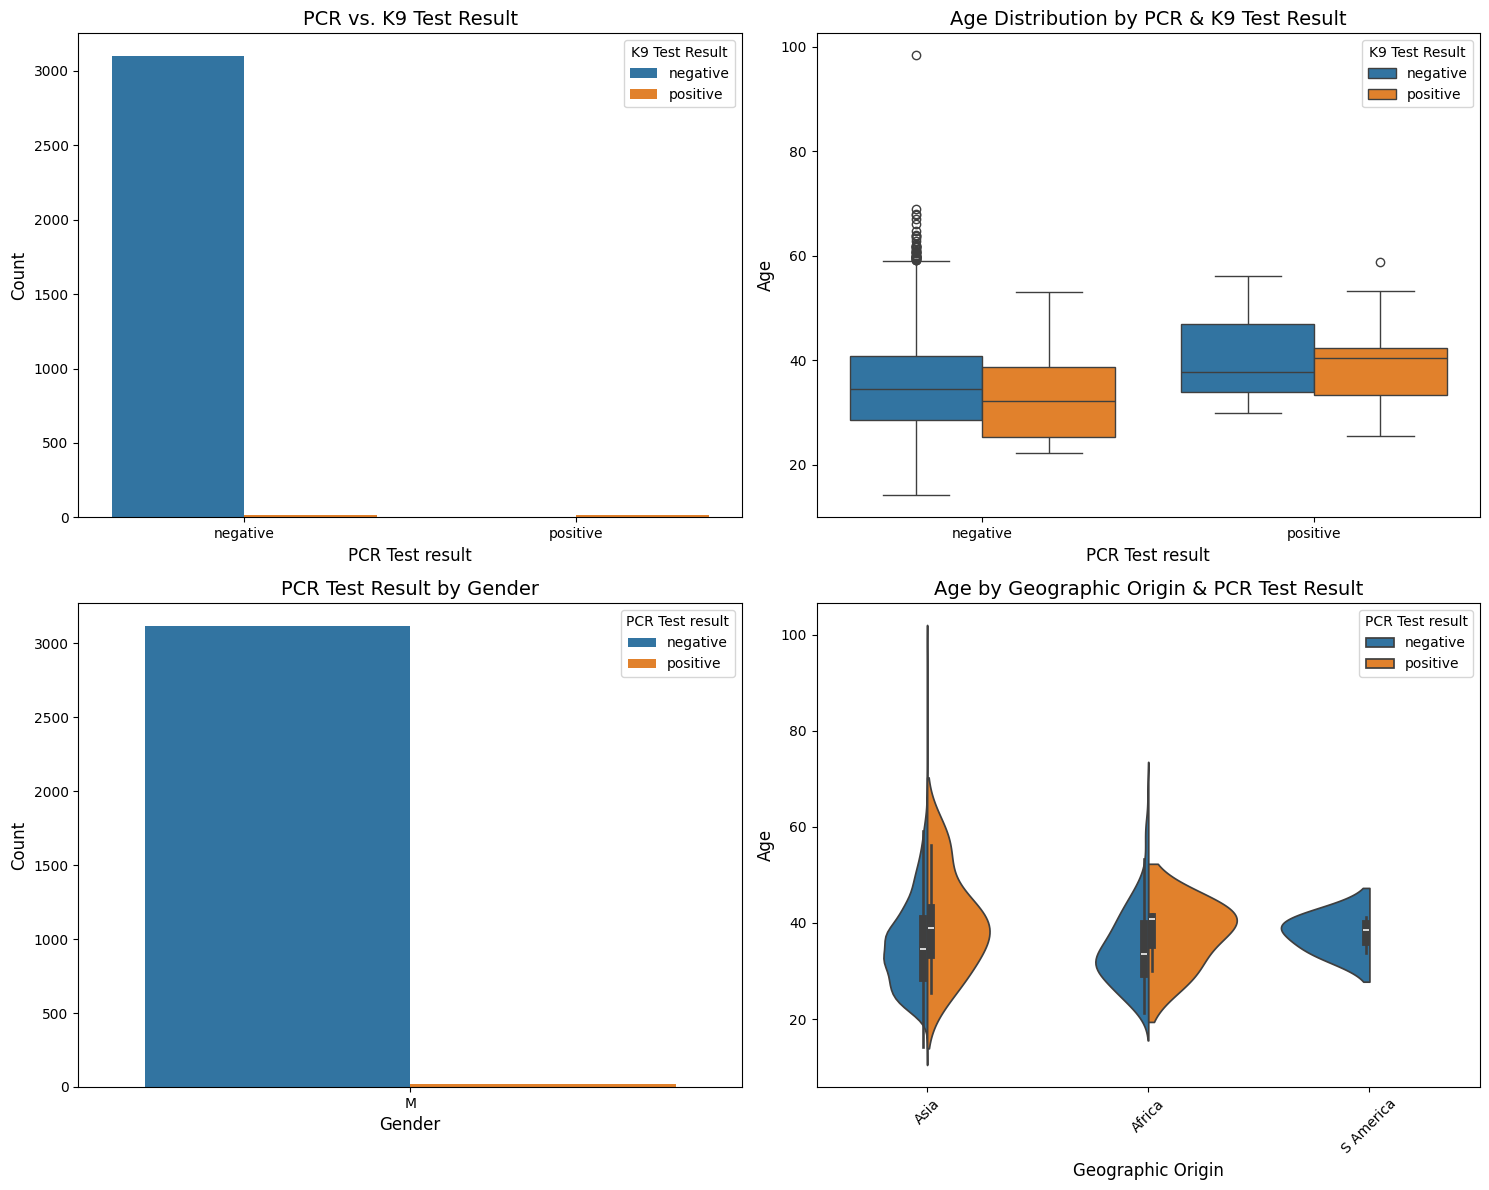

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Count Plot (PCR vs. K9 Test Result)
sns.countplot(ax=axes[0, 0], x='PCR Test result', hue='K9 Test Result', data=df)
axes[0, 0].set_title('PCR vs. K9 Test Result', fontsize=14)
axes[0, 0].set_xlabel('PCR Test result', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Plot 2: Box Plot (Age Distribution by PCR and K9 Test Result)
sns.boxplot(ax=axes[0, 1], x='PCR Test result', y='Age', hue='K9 Test Result', data=df)
axes[0, 1].set_title('Age Distribution by PCR & K9 Test Result', fontsize=14)
axes[0, 1].set_xlabel('PCR Test result', fontsize=12)
axes[0, 1].set_ylabel('Age', fontsize=12)

# Plot 3: Count Plot (PCR Test Result by Gender)
sns.countplot(ax=axes[1, 0], x='Gender (M/F)', hue='PCR Test result', data=df)
axes[1, 0].set_title('PCR Test Result by Gender', fontsize=14)
axes[1, 0].set_xlabel('Gender', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# Plot 4: Violin Plot (Age Distribution by Geographic Origin and PCR Test Result)
sns.violinplot(ax=axes[1, 1], x='Geographic Origin', y='Age', hue='PCR Test result', data=df, split=True)
axes[1, 1].set_title('Age by Geographic Origin & PCR Test Result', fontsize=14)
axes[1, 1].set_xlabel('Geographic Origin', fontsize=12)
axes[1, 1].set_ylabel('Age', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
